In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('OCD Patient Data.csv')

In [4]:
df['Medications'] = df['Medications'].fillna('None')
df['Previous Diagnoses'] = df['Previous Diagnoses'].fillna('None')

In [5]:
df

Patient ID  Age  Gender  Ethnicity Marital Status  Education Level  \
0           1018   32  Female    African         Single     Some College   
1           2406   69    Male    African       Divorced     Some College   
2           1188   57    Male   Hispanic       Divorced   College Degree   
3           6200   27  Female   Hispanic        Married   College Degree   
4           5824   56  Female   Hispanic        Married      High School   
...          ...  ...     ...        ...            ...              ...   
1495        5374   38    Male   Hispanic       Divorced   College Degree   
1496        5013   19  Female   Hispanic       Divorced  Graduate Degree   
1497        6089   40    Male      Asian        Married     Some College   
1498        3808   37  Female  Caucasian        Married     Some College   
1499        2221   18    Male  Caucasian         Single      High School   

     OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0            2016-07-15                            203                MDD   
1            2017-04-28                            180               None   
2            2018-02-02                            173                MDD   
3            2014-08-25                            126               PTSD   
4            2022-02-20                            168               PTSD   
...                 ...                            ...                ...   
1495         2019-01-10                             53                MDD   
1496         2022-09-14                            160                GAD   
1497         2018-03-13                            100               None   
1498         2018-04-14                            210                GAD   
1499         2020-12-23                             91               None   

     Family History of OCD Obsession Type Compulsion Type  \
0                       No   Harm-related        Checking   
1                      Yes   Harm-related         Washing   
2                       No  Contamination        Checking   
3                      Yes       Symmetry         Washing   
4                      Yes       Hoarding        Ordering   
...                    ...            ...             ...   
1495                    No  Contamination         Washing   
1496                   Yes       Hoarding         Praying   
1497                   Yes  Contamination        Counting   
1498                   Yes  Contamination         Washing   
1499                   Yes       Hoarding        Ordering   

      Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  \
0                            17                          10   
1                            21                          25   
2                             3                           4   
3                            14                          28   
4                            39                          18   
...                         ...                         ...   
1495                         21                          33   
1496                         25                          16   
1497                          2                          15   
1498                         16                           7   
1499                         22                          34   

     Depression Diagnosis Anxiety Diagnosis     Medications  
0                     Yes               Yes            SNRI  
1                     Yes               Yes            SSRI  
2                      No                No  Benzodiazepine  
3                     Yes               Yes            SSRI  
4                      No                No            None  
...                   ...               ...             ...  
1495                  Yes               Yes            SSRI  
1496                  Yes               Yes            SSRI  
1497                  Yes               Yes  Benzodiazepine  
1498                  Yes                No  Benzodiazepin

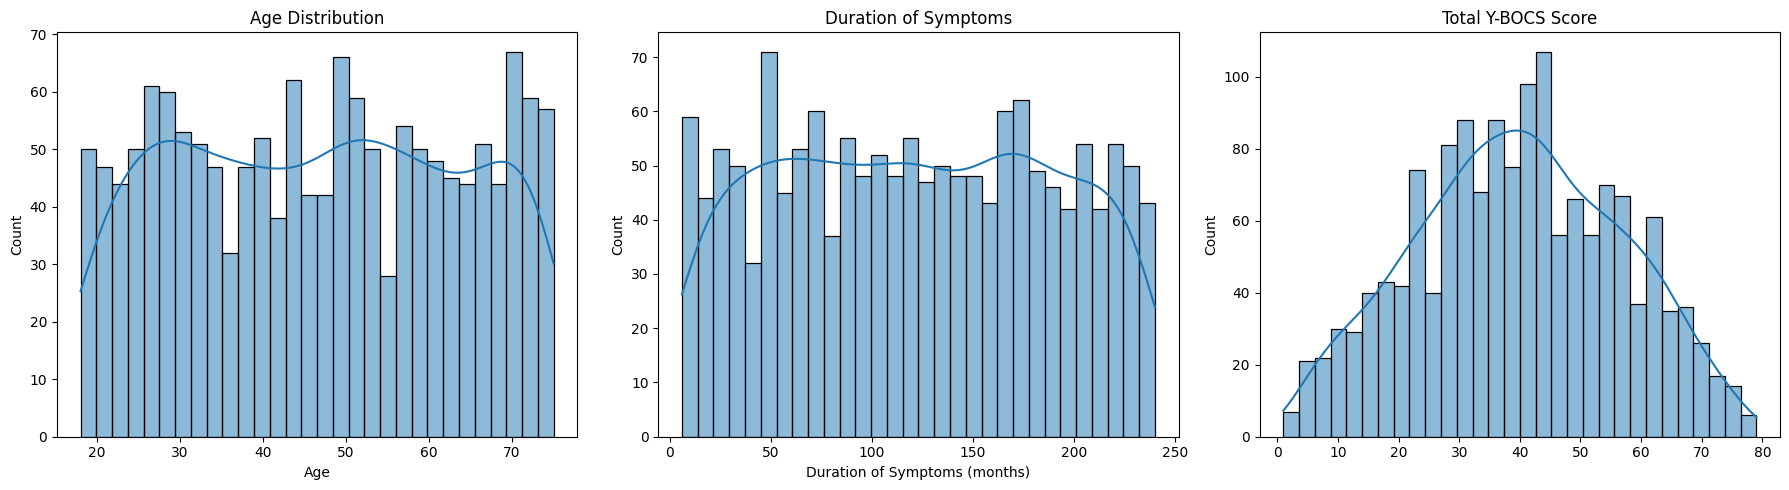

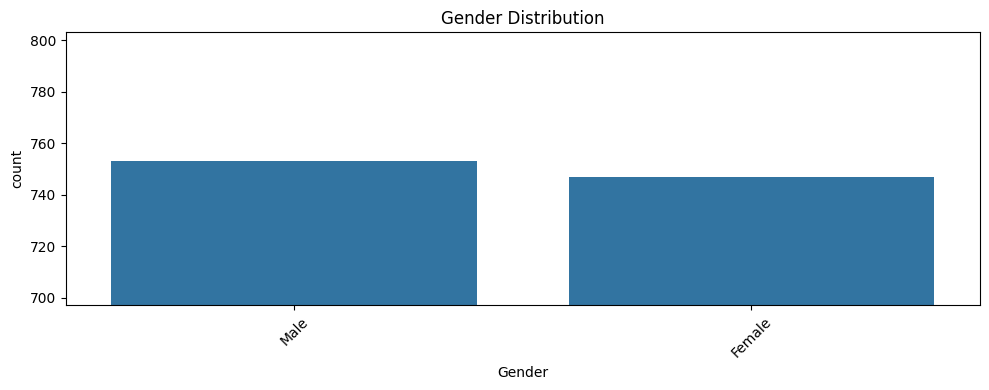

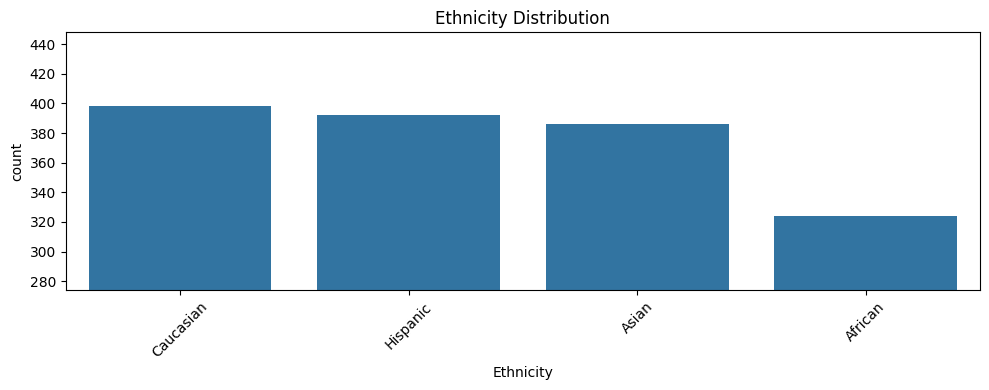

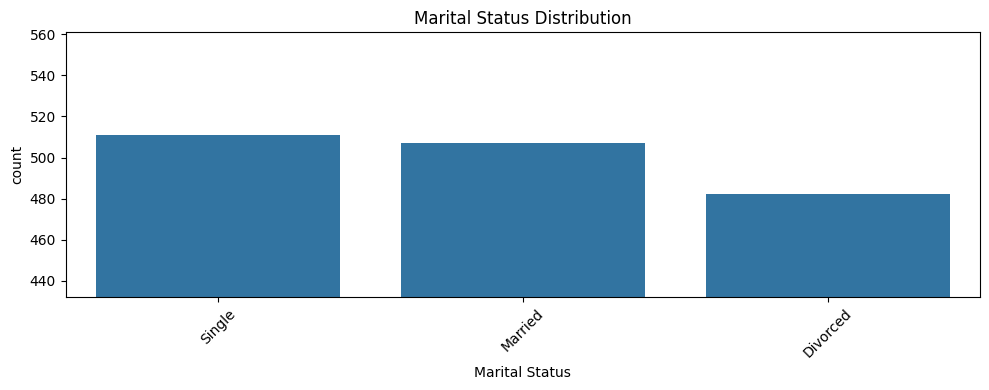

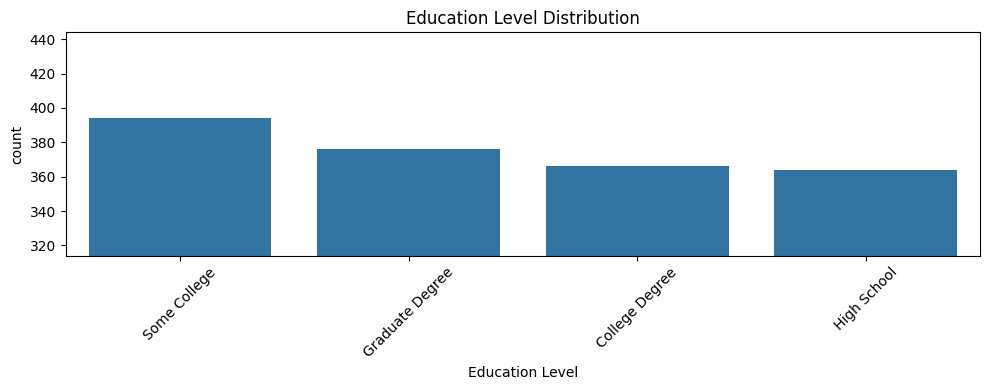

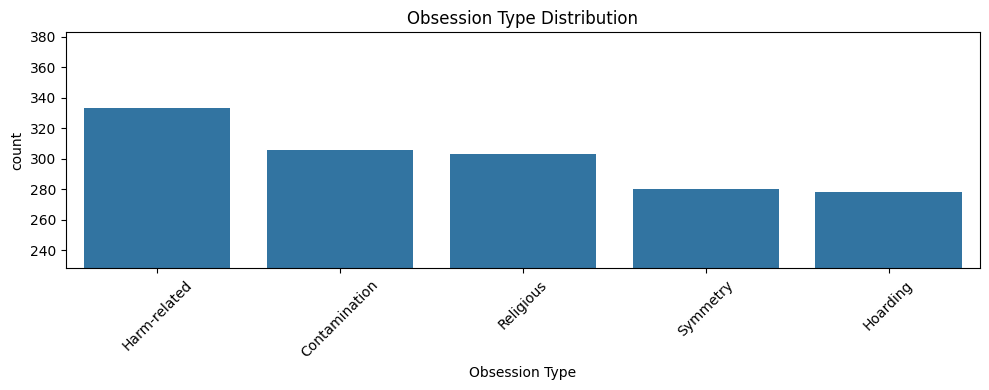

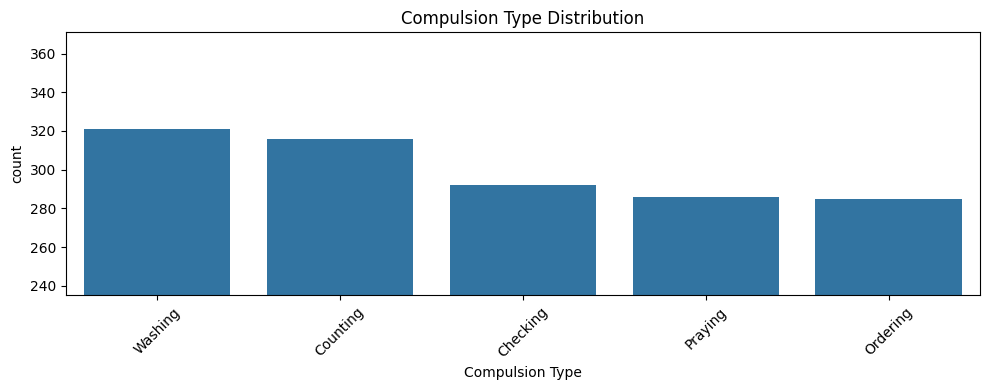

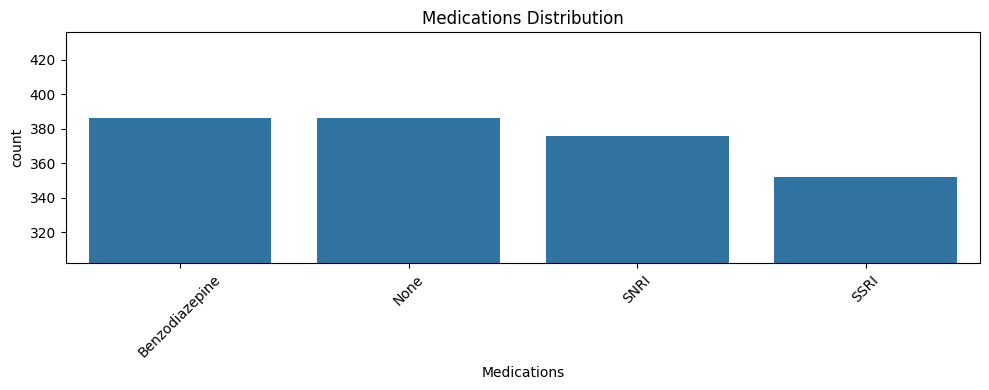

In [17]:
# Numerical distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0])
sns.histplot(df['Duration of Symptoms (months)'], bins=30, kde=True, ax=axes[1])
sns.histplot(df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)'], bins=30, kde=True, ax=axes[2])
axes[0].set_title("Age Distribution")
axes[1].set_title("Duration of Symptoms")
axes[2].set_title("Total Y-BOCS Score")
plt.tight_layout()

categoricals = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 
                'Obsession Type', 'Compulsion Type', 'Medications']

for col in categoricals:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution")
    
    # Get bar heights (counts)
    heights = [p.get_height() for p in ax.patches]
    
    if heights:
        min_height = min(heights)
        max_height = max(heights)
        lower = max(min_height - 50, 0)  # ensure lower limit doesn't go below 0
        plt.ylim(lower, max_height + 50)  # add margin above too

    plt.tight_layout()
    plt.show()


In [ ]:
'''Here We can seen, Distribution of OCD for each category available in data.'''

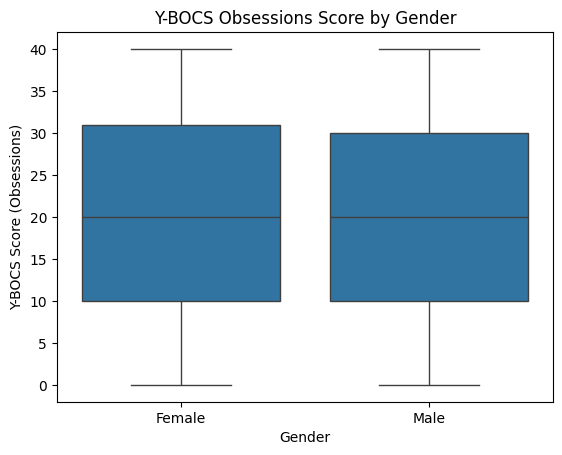

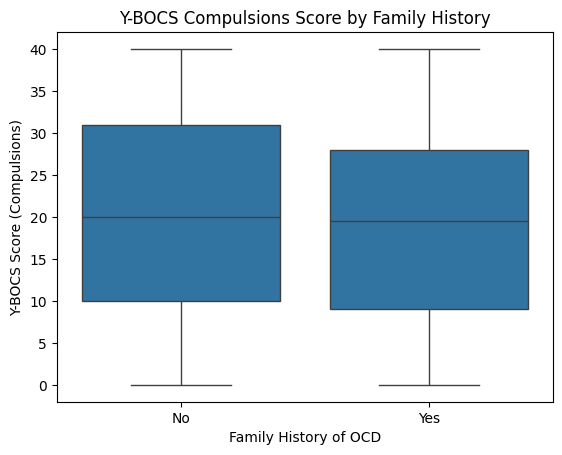

In [18]:
# Boxplots
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title("Y-BOCS Obsessions Score by Gender")
plt.show()

sns.boxplot(x='Family History of OCD', y='Y-BOCS Score (Compulsions)', data=df)
plt.title("Y-BOCS Compulsions Score by Family History")
plt.show()


In [ ]:
'''here we see Y-BOCS Obsessions Score by Gender & Y-BOCS Compulsions Score by Family History boxplots. ww see no significant difference in OCD patients gender. also, the median of score for family history present people is slighly LOWER than fresh OCD patients.we see slightly lower scores overall than new patients.'''

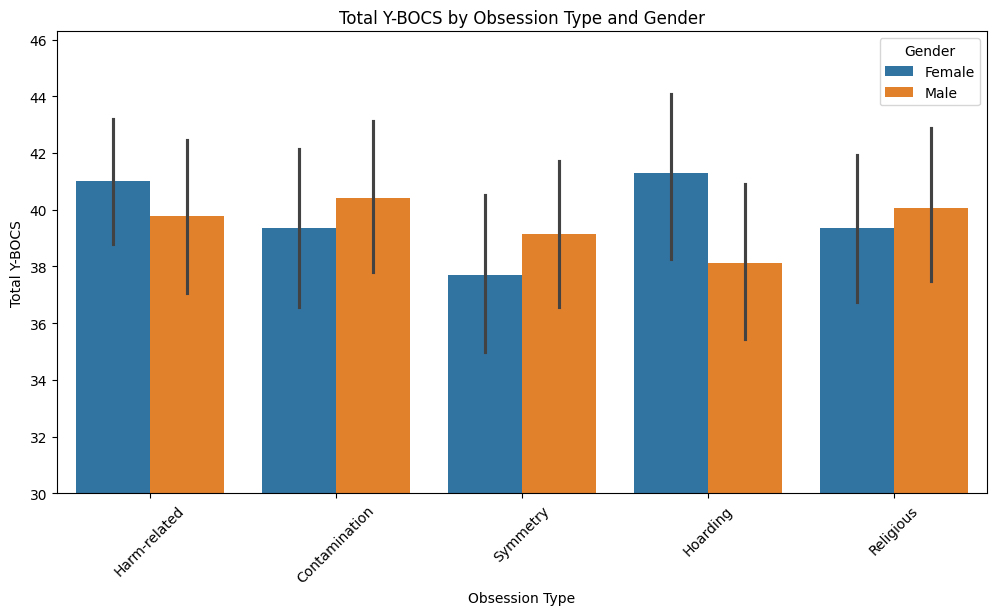

In [22]:
# Create total severity
df['Total Y-BOCS'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']

# Grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Obsession Type', y='Total Y-BOCS', hue='Gender')
plt.xticks(rotation=45)
plt.ylim(30)
plt.title("Total Y-BOCS by Obsession Type and Gender")
plt.show()


In [ ]:
''' here we see that HARM RELATED & HOARDING RELATED obsessions are seen more in FEMALES whereas others are seen more in men'''

C:\Users\Ab Deshmukh\AppData\Local\Temp\ipykernel_4956\1131274977.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Marital Status', y='Total Y-BOCS', ci='sd', order=df['Marital Status'].value_counts().index)


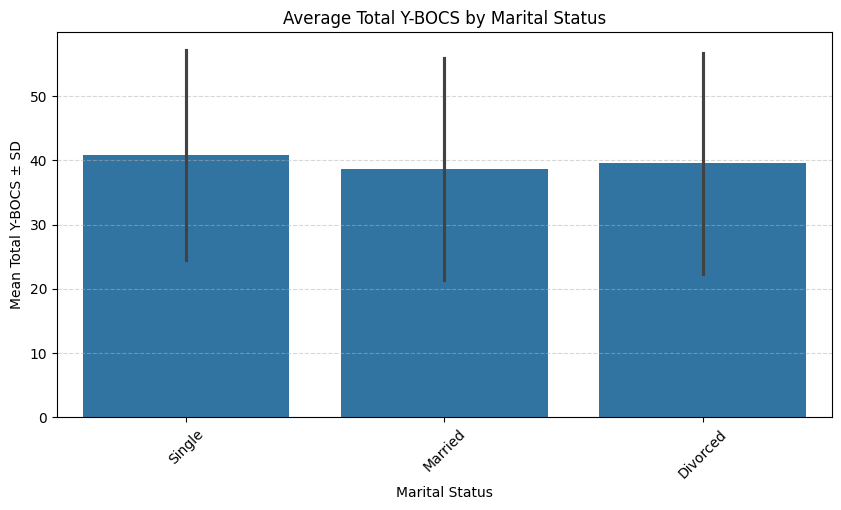

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Marital Status', y='Total Y-BOCS', ci='sd', order=df['Marital Status'].value_counts().index)
plt.title("Average Total Y-BOCS by Marital Status")
plt.xticks(rotation=45)
plt.ylabel("Mean Total Y-BOCS ± SD")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
'''there is no significant relationship between Y-BOCS score and Marital Status'''

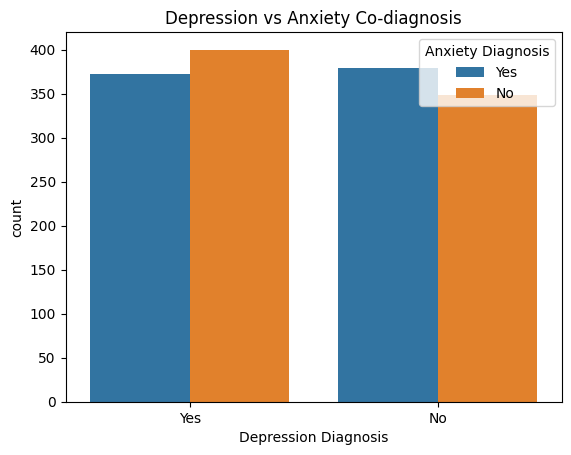

In [27]:
# Countplot of comorbidities
sns.countplot(data=df, x='Depression Diagnosis', hue='Anxiety Diagnosis')
plt.title("Depression vs Anxiety Co-diagnosis")
plt.show()


In [ ]:
''' here we see slight opposite relation in Anxiety & Depression, very minute but observable'''

In [11]:
obsession_anxiety_ct = pd.crosstab(df['Obsession Type'], df['Anxiety Diagnosis'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(obsession_anxiety_ct)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.5f}")



obsession_depression_ct = pd.crosstab(df['Obsession Type'], df['Depression Diagnosis'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(obsession_depression_ct)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.5f}")

Chi-square statistic: 4.632
p-value: 0.32720
Chi-square statistic: 1.693
p-value: 0.79195


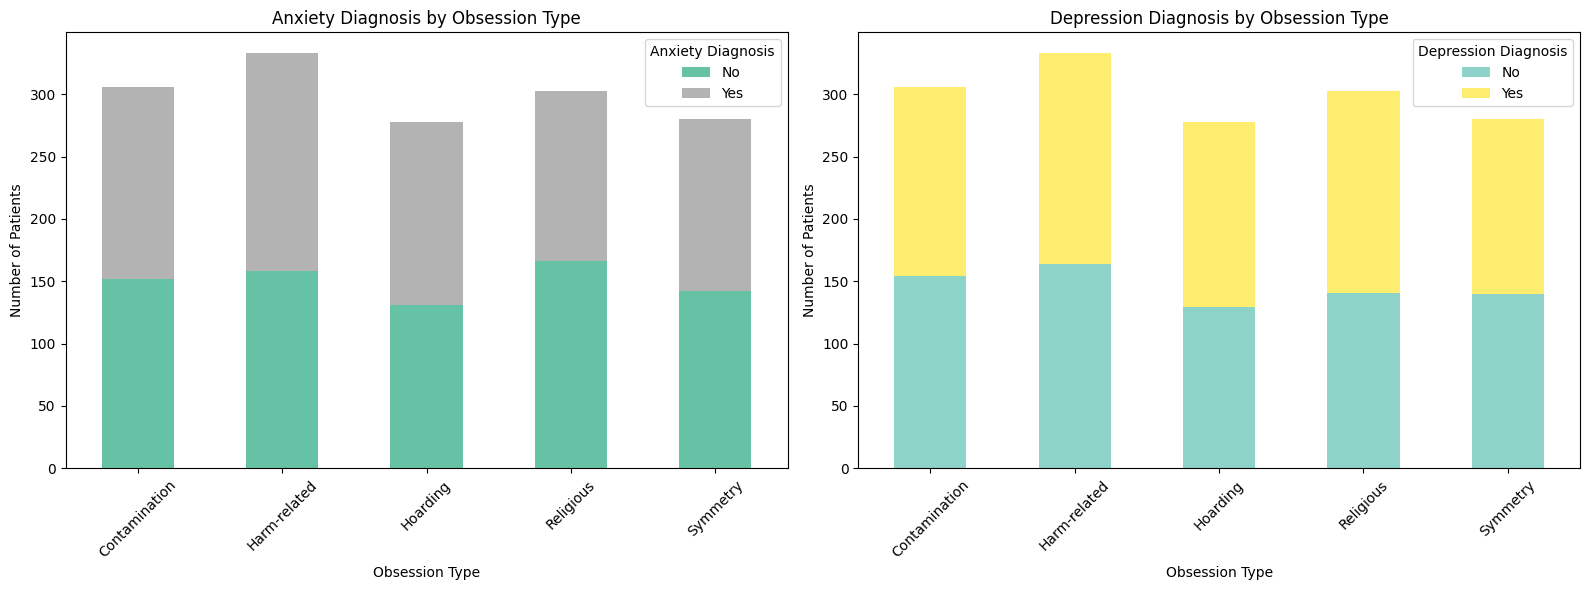

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Anxiety Diagnosis by Obsession Type ---
pd.crosstab(df['Obsession Type'], df['Anxiety Diagnosis']) \
  .plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2')
axes[0].set_title("Anxiety Diagnosis by Obsession Type")
axes[0].set_ylabel("Number of Patients")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Anxiety Diagnosis')

# --- Depression Diagnosis by Obsession Type ---
pd.crosstab(df['Obsession Type'], df['Depression Diagnosis']) \
  .plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
axes[1].set_title("Depression Diagnosis by Obsession Type")
axes[1].set_ylabel("Number of Patients")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Depression Diagnosis')

plt.tight_layout()
plt.show()


In [13]:
df['Total Y-BOCS'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']

from scipy.stats import mannwhitneyu

# Split Y-BOCS scores by depression diagnosis
group_yes = df[df['Depression Diagnosis'] == 'Yes']['Total Y-BOCS']
group_no = df[df['Depression Diagnosis'] == 'No']['Total Y-BOCS']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(group_yes, group_no, alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat:.3f}")
print(f"p-value: {p:.5f}")

Mann-Whitney U statistic: 280840.500
p-value: 0.98411


In [ ]:
''' We successfully performed EDA on this dataset and got that, majority of factors are not so much co-related except some.
All of the Statistical tests performed here suggest that there is no significant relationship between Anxienty, Depression and Obsession Type & Y-BOCS score'''

In [ ]:
# from here on, we will do work on Building ML Model which will predict Medication using features.

In [6]:
df

Patient ID  Age  Gender  Ethnicity Marital Status  Education Level  \
0           1018   32  Female    African         Single     Some College   
1           2406   69    Male    African       Divorced     Some College   
2           1188   57    Male   Hispanic       Divorced   College Degree   
3           6200   27  Female   Hispanic        Married   College Degree   
4           5824   56  Female   Hispanic        Married      High School   
...          ...  ...     ...        ...            ...              ...   
1495        5374   38    Male   Hispanic       Divorced   College Degree   
1496        5013   19  Female   Hispanic       Divorced  Graduate Degree   
1497        6089   40    Male      Asian        Married     Some College   
1498        3808   37  Female  Caucasian        Married     Some College   
1499        2221   18    Male  Caucasian         Single      High School   

     OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0            2016-07-15                            203                MDD   
1            2017-04-28                            180               None   
2            2018-02-02                            173                MDD   
3            2014-08-25                            126               PTSD   
4            2022-02-20                            168               PTSD   
...                 ...                            ...                ...   
1495         2019-01-10                             53                MDD   
1496         2022-09-14                            160                GAD   
1497         2018-03-13                            100               None   
1498         2018-04-14                            210                GAD   
1499         2020-12-23                             91               None   

     Family History of OCD Obsession Type Compulsion Type  \
0                       No   Harm-related        Checking   
1                      Yes   Harm-related         Washing   
2                       No  Contamination        Checking   
3                      Yes       Symmetry         Washing   
4                      Yes       Hoarding        Ordering   
...                    ...            ...             ...   
1495                    No  Contamination         Washing   
1496                   Yes       Hoarding         Praying   
1497                   Yes  Contamination        Counting   
1498                   Yes  Contamination         Washing   
1499                   Yes       Hoarding        Ordering   

      Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  \
0                            17                          10   
1                            21                          25   
2                             3                           4   
3                            14                          28   
4                            39                          18   
...                         ...                         ...   
1495                         21                          33   
1496                         25                          16   
1497                          2                          15   
1498                         16                           7   
1499                         22                          34   

     Depression Diagnosis Anxiety Diagnosis     Medications  
0                     Yes               Yes            SNRI  
1                     Yes               Yes            SSRI  
2                      No                No  Benzodiazepine  
3                     Yes               Yes            SSRI  
4                      No                No            None  
...                   ...               ...             ...  
1495                  Yes               Yes            SSRI  
1496                  Yes               Yes            SSRI  
1497                  Yes               Yes  Benzodiazepine  
1498                  Yes                No  Benzodiazepin

In [7]:
df.drop(columns=['Patient ID'], inplace=True)

In [8]:
df['Education Level'].value_counts()

Education Level
Some College       394
Graduate Degree    376
College Degree     366
High School        364
Name: count, dtype: int64

In [6]:
# Label Encoding: Binary and ordinal features
binary_mapping = {'Yes': 1, 'No': 0}
df['Family History of OCD'] = df['Family History of OCD'].map(binary_mapping)
df['Depression Diagnosis'] = df['Depression Diagnosis'].map(binary_mapping)
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map(binary_mapping)

# Label encoding for Education Level (ordinal)
edu_order = {
    'High School': 0,
    'Some College': 1,
    'College Degree': 2,
    'Graduate Degree': 3
}
df['Education Level'] = df['Education Level'].map(edu_order)

# One-hot encode all other categoricals
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'Marital Status', 'Previous Diagnoses'])

# Label encoding for 'Obsession Type' and 'Compulsion Type' (1/0 per category)
df = pd.get_dummies(df, columns=['Obsession Type', 'Compulsion Type'], drop_first=False)


In [10]:
# Convert boolean columns to 0/1
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

In [11]:
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Age                                1500 non-null   int64         
 1   Education Level                    1500 non-null   int64         
 2   OCD Diagnosis Date                 1500 non-null   datetime64[ns]
 3   Duration of Symptoms (months)      1500 non-null   int64         
 4   Family History of OCD              1500 non-null   int64         
 5   Y-BOCS Score (Obsessions)          1500 non-null   int64         
 6   Y-BOCS Score (Compulsions)         1500 non-null   int64         
 7   Depression Diagnosis               1500 non-null   int64         
 8   Anxiety Diagnosis                  1500 non-null   int64         
 9   Medications                        1500 non-null   object        
 10  Gender_Female                      1

In [14]:
df['Medications'].value_counts()

Medications
Benzodiazepine    386
None              386
SNRI              376
SSRI              352
Name: count, dtype: int64

In [19]:
df['YBOCS_Total'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']

df['Chronic_OCD'] = (df['Duration of Symptoms (months)'] > 24).astype(int)

df['YBOCS_Depressed'] = df['YBOCS_Total'] * df['Depression Diagnosis']

In [20]:
from sklearn.feature_selection import f_classif
import numpy as np

X = df.drop(columns=['Medications', 'OCD Diagnosis Date'])  # features
y = df['Medications']  # categorical target

f_values, p_values = f_classif(X, y)

# Combine results
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)

                              Feature   F-Score   p-value
6                Depression Diagnosis  3.604856  0.012981
34                    YBOCS_Depressed  3.362727  0.018082
2       Duration of Symptoms (months)  1.814009  0.142642
33                        Chronic_OCD  1.801454  0.144966
25           Obsession Type_Religious  1.472767  0.220159
3               Family History of OCD  1.462666  0.222963
5          Y-BOCS Score (Compulsions)  1.345165  0.258092
21  Previous Diagnoses_Panic Disorder  1.310321  0.269442
29           Compulsion Type_Ordering  1.290766  0.276008
11                    Ethnicity_Asian  1.248094  0.290841
24            Obsession Type_Hoarding  1.203033  0.307277
22       Obsession Type_Contamination  1.177667  0.316890
30            Compulsion Type_Praying  1.167623  0.320769
28           Compulsion Type_Counting  1.133146  0.334407
23        Obsession Type_Harm-related  1.072149  0.359783
7                   Anxiety Diagnosis  1.026649  0.379783
31            

In [16]:
df['YBOCS_Ratio_Obs_Comp'] = df['Y-BOCS Score (Obsessions)'] / (df['Y-BOCS Score (Compulsions)'] + 1)

df['Years_Since_Diagnosis'] = (pd.Timestamp.today() - df['OCD Diagnosis Date']).dt.days / 365

df['No_Partner'] = ((df['Marital Status_Single'] == 1) | (df['Marital Status_Divorced'] == 1)).astype(int)

In [23]:
obsession_cols = [col for col in df.columns if 'Obsession Type' in col]
compulsion_cols = [col for col in df.columns if 'Compulsion Type' in col]

df['Num_Obsessions'] = df[obsession_cols].sum(axis=1)
df['Num_Compulsions'] = df[compulsion_cols].sum(axis=1)
df['Obs_Comp_Imbalance'] = abs(df['Num_Obsessions'] - df['Num_Compulsions'])

In [27]:
df.drop(columns=[
    'Num_Obsessions',
    'Num_Compulsions',
    'Obs_Comp_Imbalance',
    'Compulsion Type_Washing',
    'Compulsion Type_Checking',
    'Ethnicity_Hispanic',
    'Ethnicity_African',
    'Ethnicity_Caucasian',
    'Obsession Type_Symmetry',
    'Marital Status_Divorced',
    'No_Partner',
    'Marital Status_Married',
    'Y-BOCS Score (Obsessions)',
    'Previous Diagnoses_GAD',
    'Previous Diagnoses_MDD',
    'Gender_Male',
    'Gender_Female',
    'Education Level',
    'Previous Diagnoses_None',
    'Age',
    'Years_Since_Diagnosis',
    'Previous Diagnoses_PTSD',
    'Years_Since_Dx_Norm',
    'Marital Status_Single'
], inplace=True)


In [28]:
from sklearn.feature_selection import f_classif
import numpy as np

X = df.drop(columns=['Medications', 'OCD Diagnosis Date'])  # features
y = df['Medications']  # categorical target

f_values, p_values = f_classif(X, y)

# Combine results
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)

                              Feature   F-Score   p-value
15                Medications_encoded       inf  0.000000
3                Depression Diagnosis  3.604856  0.012981
0       Duration of Symptoms (months)  1.814009  0.142642
10           Obsession Type_Religious  1.472767  0.220159
1               Family History of OCD  1.462666  0.222963
2          Y-BOCS Score (Compulsions)  1.345165  0.258092
6   Previous Diagnoses_Panic Disorder  1.310321  0.269442
12           Compulsion Type_Ordering  1.290766  0.276008
5                     Ethnicity_Asian  1.248094  0.290841
14               YBOCS_Ratio_Obs_Comp  1.217036  0.302083
9             Obsession Type_Hoarding  1.203033  0.307277
7        Obsession Type_Contamination  1.177667  0.316890
13            Compulsion Type_Praying  1.167623  0.320769
11           Compulsion Type_Counting  1.133146  0.334407
8         Obsession Type_Harm-related  1.072149  0.359783
4                   Anxiety Diagnosis  1.026649  0.379783


C:\Users\Ab Deshmukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [7]:
# Define the mapping
medication_mapping = {
    'SSRI': 0,
    'SNRI': 1,
    'None': 2,
    'Benzodiazepine': 3
}

# Apply the mapping to the 'Medications' column
df['Medications_encoded'] = df['Medications'].map(medication_mapping)

# Check the result
print(df[['Medications', 'Medications_encoded']].head())


      Medications  Medications_encoded
0            SNRI                    1
1            SSRI                    0
2  Benzodiazepine                    3
3            SSRI                    0
4            None                    2


In [36]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(columns=['Medications_encoded','OCD Diagnosis Date'])
y = df['Medications_encoded']

# Split into train-test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   OCD Diagnosis Date                 1500 non-null   datetime64[ns]
 1   Duration of Symptoms (months)      1500 non-null   int64         
 2   Family History of OCD              1500 non-null   int64         
 3   Y-BOCS Score (Compulsions)         1500 non-null   int64         
 4   Depression Diagnosis               1500 non-null   int64         
 5   Anxiety Diagnosis                  1500 non-null   int64         
 6   Ethnicity_Asian                    1500 non-null   int32         
 7   Previous Diagnoses_Panic Disorder  1500 non-null   int32         
 8   Obsession Type_Contamination       1500 non-null   int32         
 9   Obsession Type_Harm-related        1500 non-null   int32         
 10  Obsession Type_Hoarding            1

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Use pipeline to scale then train logistic regression
logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=300, solver='lbfgs', multi_class='multinomial', random_state=42)
)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Multinomial Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Multinomial Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        71
           1       0.27      0.25      0.26        75
           2       0.26      0.38      0.31        77
           3       0.29      0.25      0.27        77

    accuracy                           0.27       300
   macro avg       0.27      0.26      0.26       300
weighted avg       0.27      0.27      0.26       300



C:\Users\Ab Deshmukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create pipeline: scale features then train SVC
svc_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, random_state=42)
)

# Train
svc_pipeline.fit(X_train, y_train)

# Predict
y_pred_svc = svc_pipeline.predict(X_test)

# Evaluate
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.13      0.14        71
           1       0.28      0.25      0.27        75
           2       0.28      0.35      0.31        77
           3       0.25      0.27      0.26        77

    accuracy                           0.25       300
   macro avg       0.25      0.25      0.25       300
weighted avg       0.25      0.25      0.25       300



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest with parameters that control overfitting:
rf = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Max depth of each tree (limits complexity)
    min_samples_split=5,       # Min samples required to split a node
    min_samples_leaf=2,        # Min samples required at a leaf node
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.23      0.25        71
           2       0.25      0.20      0.22        75
           3       0.24      0.31      0.27        77
           4       0.24      0.26      0.25        77

    accuracy                           0.25       300
   macro avg       0.25      0.25      0.25       300
weighted avg       0.25      0.25      0.25       300



In [41]:
import xgboost as xgb

# Initialize XGBoost classifier with L2 regularization (lambda)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, reg_lambda=1.0, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.13      0.14        71
           1       0.23      0.23      0.23        75
           2       0.21      0.22      0.22        77
           3       0.26      0.29      0.27        77

    accuracy                           0.22       300
   macro avg       0.21      0.21      0.21       300
weighted avg       0.21      0.22      0.21       300



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Select features and target
selected_features = ['Depression Diagnosis', 'Duration of Symptoms (months)']
X = df[selected_features]
y = df['Medications_encoded']  # Replace with your actual target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model (example: RandomForest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Classification Report with Depression + Duration only:")
print(classification_report(y_test, y_pred))


Classification Report with Depression + Duration only:
              precision    recall  f1-score   support

           0       0.26      0.25      0.26        71
           1       0.21      0.21      0.21        75
           2       0.23      0.25      0.24        77
           3       0.25      0.23      0.24        77

    accuracy                           0.24       300
   macro avg       0.24      0.24      0.24       300
weighted avg       0.24      0.24      0.24       300



Explained variance ratio by components: [0.25116715 0.17649171 0.16953425]


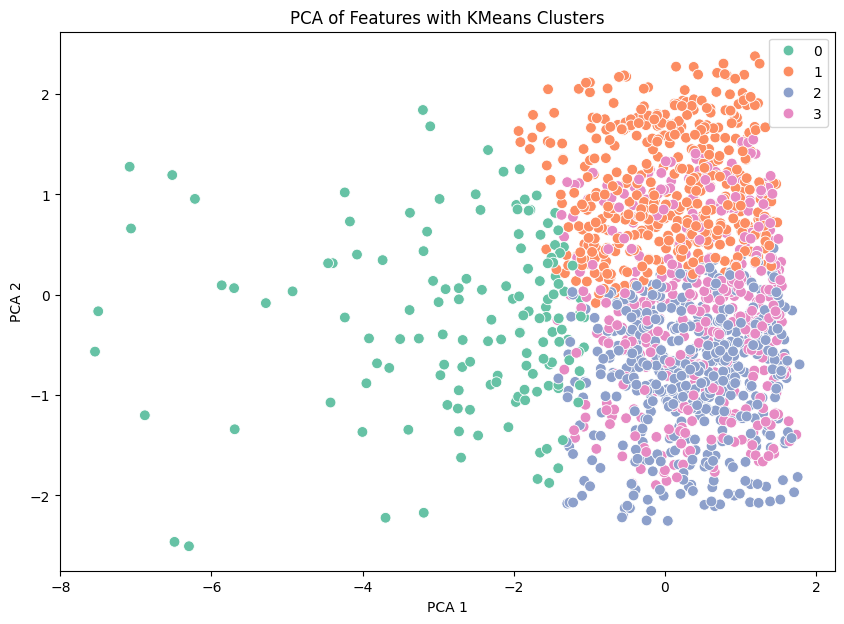

Medications_encoded    0    1    2    3
cluster                                
0                     42   37   32   33
1                     99  110  141  103
2                    112  130  119  125
3                     99   99   94  125


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select numeric features (excluding target)
features = df.drop(columns=['Medications_encoded'])  # replace target_column_name with your target
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# 3. PCA (reduce to 2 components for visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by components:", pca.explained_variance_ratio_)

# 4. KMeans clustering (choose k=4 assuming 4 classes, adjust as needed)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster info to DataFrame for analysis
df['cluster'] = clusters

# 5. Visualization
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2', s=60)
plt.title('PCA of Features with KMeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 6. Compare clusters to target labels (optional)
ct = pd.crosstab(df['cluster'], df['Medications_encoded'])
print(ct)


In [47]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.26776661360444676


In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_pca)
df['dbscan_cluster'] = db_clusters

# Count points in each cluster
print(df['dbscan_cluster'].value_counts())

# Recalculate silhouette (only if more than 1 cluster is found)
from sklearn.metrics import silhouette_score
if len(set(db_clusters)) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(X_pca, db_clusters))


dbscan_cluster
 0    1491
-1       9
Name: count, dtype: int64
Silhouette Score (DBSCAN): 0.6532075577039708


In [49]:
outliers = df[df['dbscan_cluster'] == -1]
print(outliers[['Medications_encoded', 'Depression Diagnosis', 'Duration of Symptoms (months)']])


     Medications_encoded  Depression Diagnosis  Duration of Symptoms (months)
32                     3                     0                             58
96                     3                     0                             33
190                    2                     1                            229
284                    1                     1                            171
324                    0                     0                            201
467                    1                     1                            216
520                    2                     0                             28
609                    0                     1                            179
819                    0                     0                             77


In [50]:
df['is_outlier'] = df['dbscan_cluster'].apply(lambda x: 1 if x == -1 else 0)

In [51]:
pca_full = PCA(n_components=0.95)
X_pca_full = pca_full.fit_transform(X_scaled)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_pca_full)
print("Clusters:", pd.Series(labels).value_counts())
print("Silhouette (Full PCA):", silhouette_score(X_pca_full, labels))


Clusters:  6    198
 4    197
 5    185
 7    185
 1    184
 0    183
 3    183
 2    158
-1     27
Name: count, dtype: int64
Silhouette (Full PCA): 0.32086164375561466


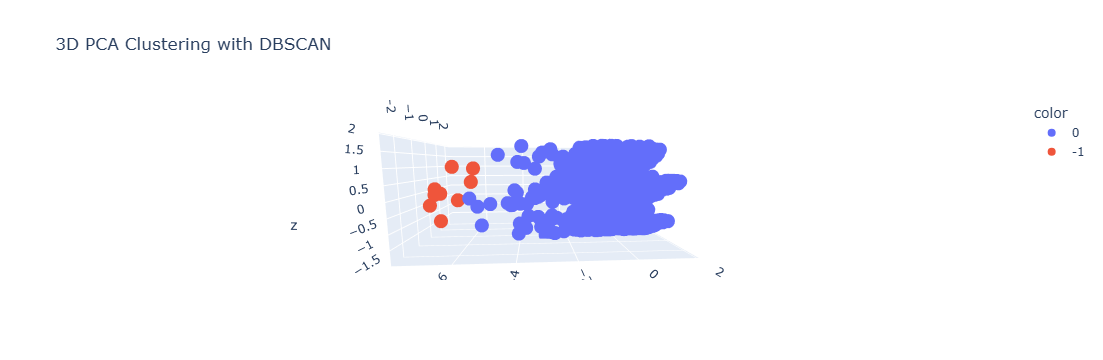

In [52]:
df['cluster_label'] = df['dbscan_cluster'] 
import plotly.express as px

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    color=df['dbscan_cluster'].astype(str),
    title="3D PCA Clustering with DBSCAN"
)
fig.show()


In [ ]:
'''Interpretation:
Your dataset does not have very strong, clear-cut clusters based on the features and PCA space you tried.

We tried Supervised models, but they didnt worked well...

Clustering helps identify some structure but doesn’t perfectly segment patients by medication class.

DBSCAN’s high silhouette is due to the fact it’s basically creating one large cluster with a few outliers — not great for meaningful subgrouping.

PCA is reducing dimensionality but the features themselves may not separate classes distinctly.'''

In [ ]:
'''What does this mean practically?
Clustering alone is not sufficient to reliably predict Medications_encoded.

The clusters can be used as an additional weak feature in a supervised model, but don’t expect massive performance gains.'''

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and Target
X = df[['Depression Diagnosis']]
y = df['Medications_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Softmax Regression (multiclass logistic regression)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.00      0.00      0.00        75
           2       0.26      0.52      0.35        77
           3       0.23      0.44      0.30        77

    accuracy                           0.25       300
   macro avg       0.12      0.24      0.16       300
weighted avg       0.13      0.25      0.17       300

Confusion Matrix:
 [[ 0  0 31 40]
 [ 0  0 37 38]
 [ 0  0 40 37]
 [ 0  0 43 34]]
